In [1]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

from edatools import correlational_matrix_heatmap, correlation_bar_graph
CLEAN_DATA_DIR = "../data/clean"

# Checking for Multicolinearity

### Correlation Matrix: HouseholdInfo

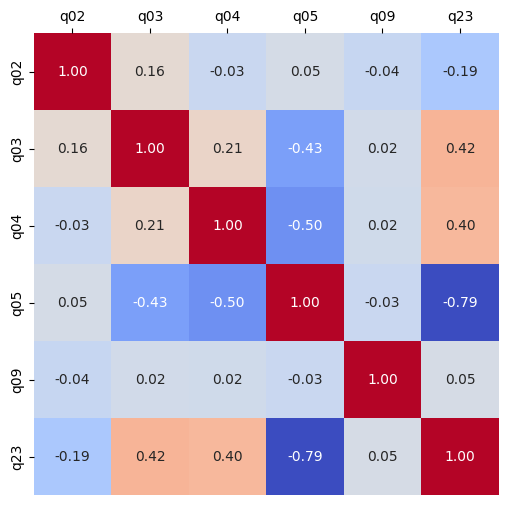

In [13]:
house_train = pd.read_csv(os.path.join(CLEAN_DATA_DIR, "train_HouseholdInfo_clean.csv"))
correlational_matrix_heatmap(house_train, cols_to_exclude=['psu_hh_idcode', 'hhid'])

### Observations:
1. q17 and q11 are pretty highly correlated (0.88) shoudl we get rid of either one?
  
     - q11(1 if mom is living in the household, 0 otherwise)
     - q17(1 if dad is living in the household, 0 otherwise)

      > we decided to combine the two to create a new column q23 such that:
            q23 ( 0 if neither mom,dad live in household, 1 if one of them, 2 if both)


2. q10 has undefined variance.
   - reason: q10 only takes value 1 for all rows, so no variance. 0 variance means undefined correlation with any other variate.
   - because Correlation r between two variates X and Y:
  
    $$
      r = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}
$$

      > we decided to get rid of this column

3. >Our threshold for high correlation was >0.8. 

### Correlational Matrix: Educataion

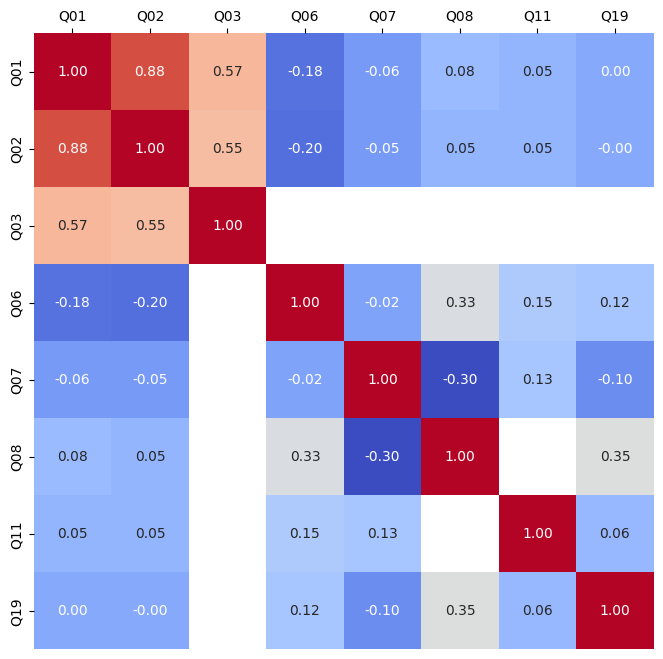

In [14]:
edu_train = pd.read_csv(os.path.join(CLEAN_DATA_DIR, "train_Education_clean.csv"))
correlational_matrix_heatmap(edu_train, fig_size=(8,8), cols_to_exclude=['psu_hh_idcode'])

### Observations:
- We cant calculate correlation between Q3 and subsequent variates because Q4,Q5,etc... only have responses when Q3 == 1. This means that Q3 has variance 0 which gives an undefined correlation. 
- same for undefined correlation with Q8 and Q11, since Q11 only has a response when Q8 is "NO". 
- Q1 and Q2 have high correlation (0.88) => keep Q1
- Q4 and Q6 have high correlation (0.87)
- Q4 and Q5 : 버려 
- Q18 날려
- Q17 날려 (11이랑 넘 비슷함)
- Q14 날려 (8이랑 비슷함)
- cols to keep:

# Correlation Analysis: explanatory variates to ratings

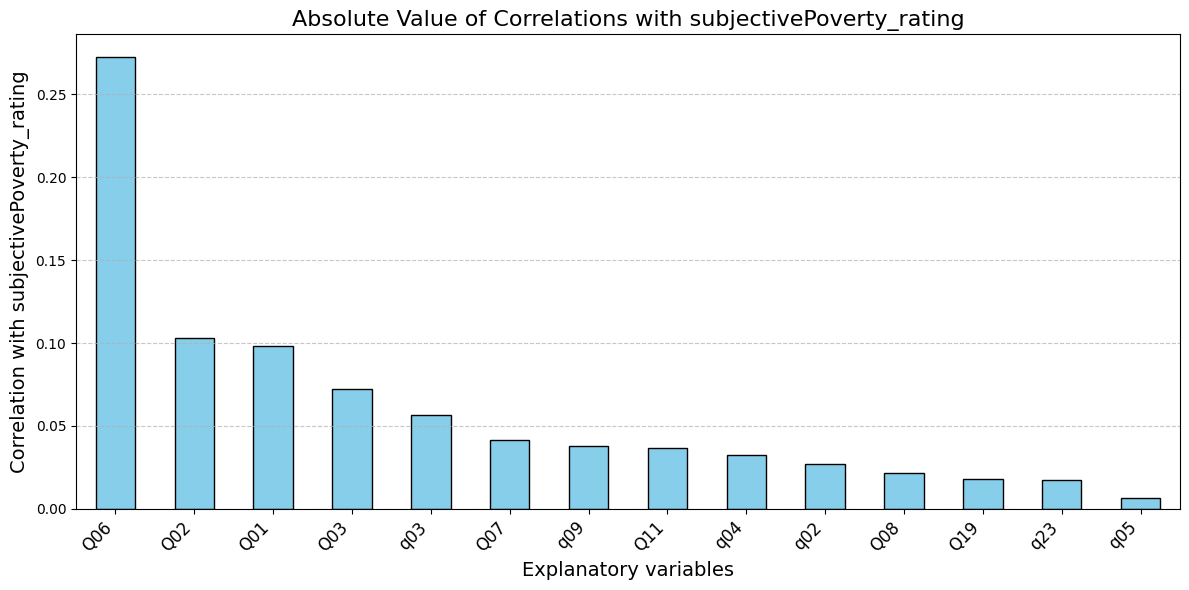

In [2]:
house_train = pd.read_csv(os.path.join(CLEAN_DATA_DIR, "train_HouseholdInfo_clean.csv"))
edu_train = pd.read_csv(os.path.join(CLEAN_DATA_DIR, "train_Education_clean.csv"))
ratings_train = pd.read_csv(os.path.join(CLEAN_DATA_DIR, "train_SubjectivePoverty_clean.csv"))

merged_train = ratings_train.merge(house_train, on='psu_hh_idcode').merge(edu_train, on='psu_hh_idcode')

correlation_bar_graph(merged_train, fig_size=(12,6), y_col='subjectivePoverty_rating', x_cols_to_exclude=['hhid', 'psu_hh_idcode'])
#correlations = merged_train.corr()['subjectivePoverty_rating'].sort_values(ascending=False)
# correlations = correlations[correlations.index != 'subjectivePoverty_rating']


We generated a graph for correlations with the ratings for each explanatory variable. The chart graphs absolute value of the correlation, just to see the strength of relationship with our y variate. 

Q06: 최종학력 has the highest absolute correlation with the rating of about 0.27.